In [1]:
#importação de bibliotecas necessários do pyhton
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importação do dataset 
file = pd.read_csv('partos-e-cesarianas.csv', sep=';', on_bad_lines='skip')
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Período                 5271 non-null   object 
 1   Região                  5271 non-null   object 
 2   Instituição             5271 non-null   object 
 3   Localização Geográfica  5271 non-null   object 
 4   Nº Total de Partos      5250 non-null   float64
 5   Nº Cesarianas           5250 non-null   float64
dtypes: float64(2), object(4)
memory usage: 247.2+ KB
None


In [3]:
#descrever o dataset
print (file.describe())

       Nº Total de Partos  Nº Cesarianas
count         5250.000000    5250.000000
mean           943.778286     275.840000
std            782.023730     223.061266
min              0.000000       0.000000
25%            344.000000     105.000000
50%            738.000000     218.000000
75%           1336.000000     391.000000
max           4949.000000    1426.000000


In [5]:
#listar as instituições totais em cada regiao

instituicoes_por_regiao = file.groupby("Região")["Instituição"].unique()
for regiao, instituicoes in instituicoes_por_regiao.items():
    print(f"Região: {regiao}")
    print(f"Total de instituições: {len(instituicoes)}")
    print("\n")




Região: Região de Saúde LVT
Total de instituições: 27


Região: Região de Saúde Norte
Total de instituições: 28


Região: Região de Saúde do Alentejo
Total de instituições: 6


Região: Região de Saúde do Algarve
Total de instituições: 2


Região: Região de Saúde do Centro
Total de instituições: 14




In [7]:
# Filtrar para a região de saúde "Região de Saúde do Algarve"
regiao_algarve = file[file["Região"] == "Região de Saúde do Algarve"]

# Converter a coluna de Período para o tipo datetime, se necessário
regiao_algarve['Período'] = pd.to_datetime(regiao_algarve['Período'], format='%Y-%m')

# Extrair o ano da coluna de Período
regiao_algarve['Ano'] = regiao_algarve['Período'].dt.year

# Agrupar por ano e somar o número de partos e cesarianas
resultados_por_ano = regiao_algarve.groupby("Ano")[["Nº Total de Partos", "Nº Cesarianas"]].sum().reset_index()

# Exibir os resultados
print("Número total de partos e cesarianas por ano na Região de Saúde do Algarve:")
for index, row in resultados_por_ano.iterrows():
    print(f"Ano: {row['Ano']}, Número total de partos: {row['Nº Total de Partos']}, Número total de cesarianas: {row['Nº Cesarianas']}")

Número total de partos e cesarianas por ano na Região de Saúde do Algarve:
Ano: 2013.0, Número total de partos: 22364.0, Número total de cesarianas: 7060.0
Ano: 2014.0, Número total de partos: 21446.0, Número total de cesarianas: 5732.0
Ano: 2015.0, Número total de partos: 22781.0, Número total de cesarianas: 5680.0
Ano: 2016.0, Número total de partos: 23631.0, Número total de cesarianas: 6110.0
Ano: 2017.0, Número total de partos: 23359.0, Número total de cesarianas: 6240.0
Ano: 2018.0, Número total de partos: 23823.0, Número total de cesarianas: 6253.0
Ano: 2019.0, Número total de partos: 24429.0, Número total de cesarianas: 7467.0
Ano: 2020.0, Número total de partos: 23518.0, Número total de cesarianas: 6568.0
Ano: 2021.0, Número total de partos: 22236.0, Número total de cesarianas: 6473.0
Ano: 2022.0, Número total de partos: 21585.0, Número total de cesarianas: 6606.0
Ano: 2023.0, Número total de partos: 22990.0, Número total de cesarianas: 7259.0
Ano: 2024.0, Número total de parto

/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/2232813627.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regiao_algarve['Período'] = pd.to_datetime(regiao_algarve['Período'], format='%Y-%m')
/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/2232813627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regiao_algarve['Ano'] = regiao_algarve['Período'].dt.year


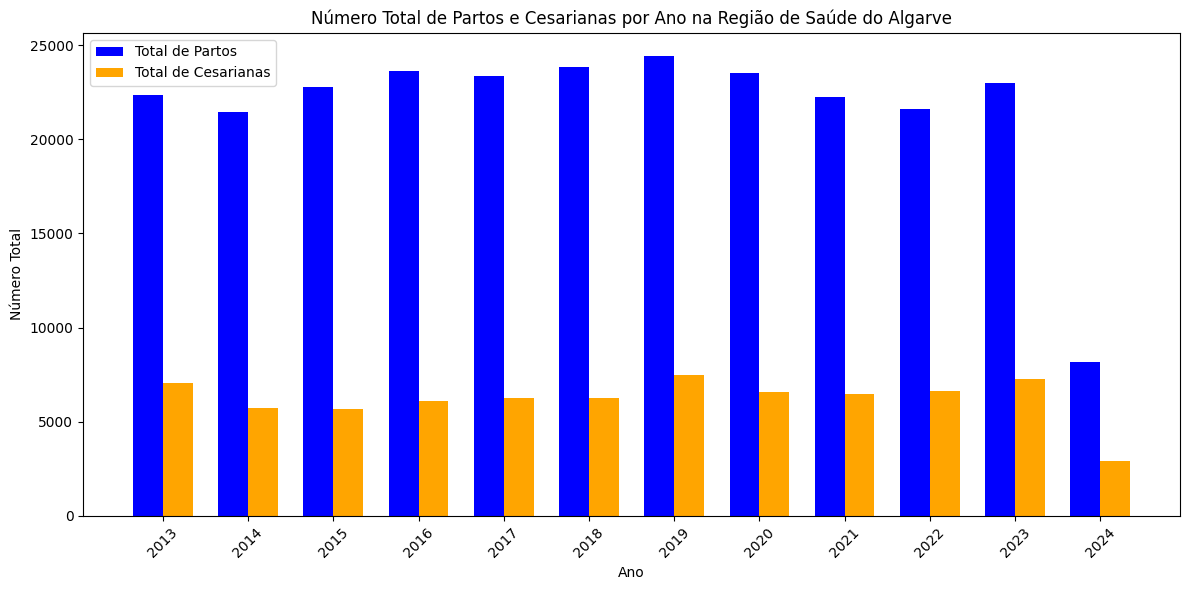

In [8]:
# Definir o gráfico
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(resultados_por_ano))

# Criar barras para partos e cesarianas
plt.bar(index, resultados_por_ano["Nº Total de Partos"], width=bar_width, label="Total de Partos", color='blue')
plt.bar([i + bar_width for i in index], resultados_por_ano["Nº Cesarianas"], width=bar_width, label="Total de Cesarianas", color='orange')

# Adicionar rótulos e título
plt.xlabel("Ano")
plt.ylabel("Número Total")
plt.title("Número Total de Partos e Cesarianas por Ano na Região de Saúde do Algarve")
plt.xticks([i + bar_width / 2 for i in index], resultados_por_ano["Ano"], rotation=45)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()  # Exibe o gráfico no console

Número total de partos e cesarianas por região e ano:
                         Região   Ano  Nº Total de Partos  Nº Cesarianas
0           Região de Saúde LVT  2013            178835.0        52136.0
1           Região de Saúde LVT  2014            177713.0        47747.0
2           Região de Saúde LVT  2015            183294.0        48313.0
3           Região de Saúde LVT  2016            189136.0        49712.0
4           Região de Saúde LVT  2017            189270.0        49898.0
5           Região de Saúde LVT  2018            191661.0        52578.0
6           Região de Saúde LVT  2019            193305.0        54539.0
7           Região de Saúde LVT  2020            182650.0        53504.0
8           Região de Saúde LVT  2021            162548.0        47935.0
9           Região de Saúde LVT  2022            159821.0        50196.0
10          Região de Saúde LVT  2023            162445.0        51081.0
11          Região de Saúde LVT  2024             57020.0        18225

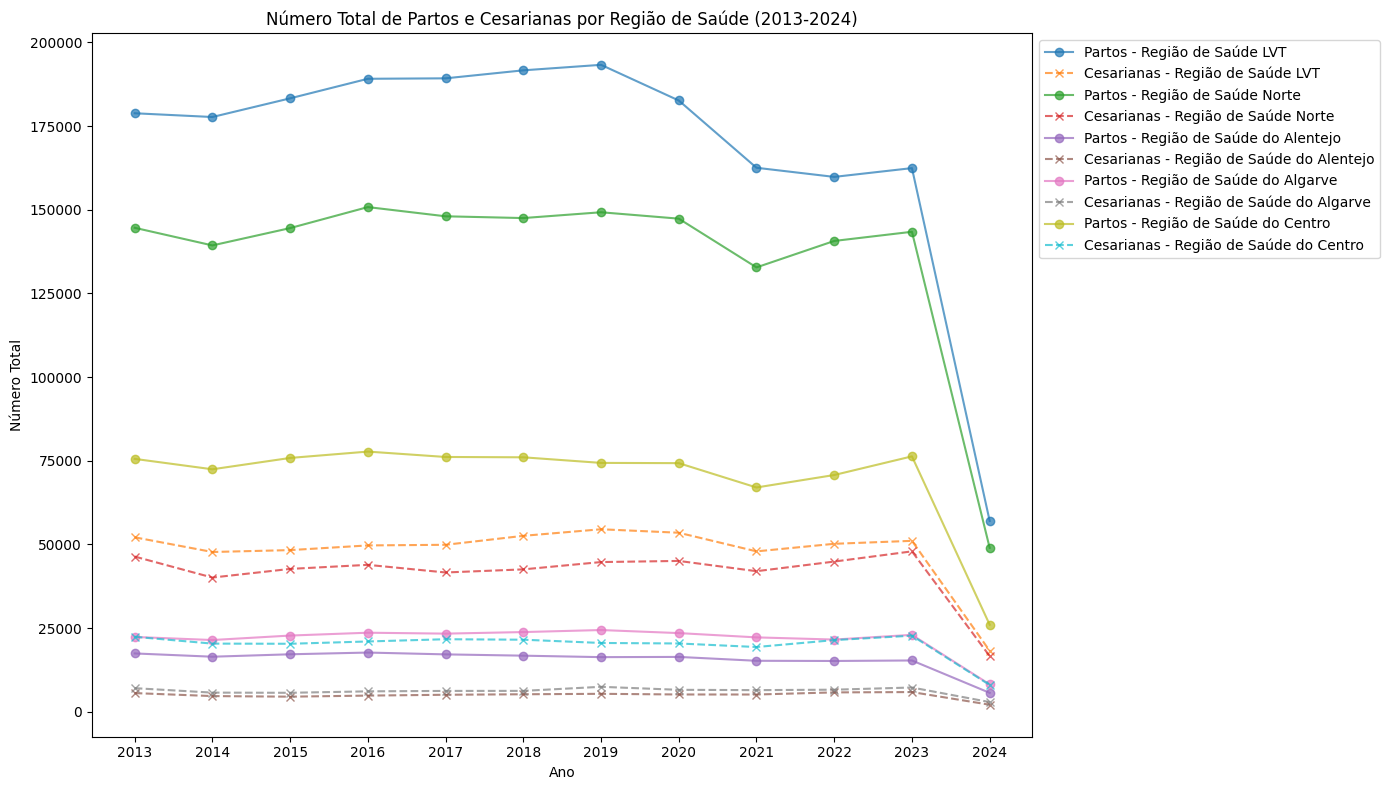

In [9]:


# Converter a coluna de Período para o tipo datetime
file['Período'] = pd.to_datetime(file['Período'], format='%Y-%m')

# Extrair o ano da coluna de Período
file['Ano'] = file['Período'].dt.year

# Filtrar os dados para os anos de 2013 a 2024
file_filtered = file[(file['Ano'] >= 2013) & (file['Ano'] <= 2024)]

# Agrupar por Região e Ano, somando o número de partos e cesarianas
resultados_por_regiao = file_filtered.groupby(['Região', 'Ano'])[['Nº Total de Partos', 'Nº Cesarianas']].sum().reset_index()

# Exibir os resultados
print("Número total de partos e cesarianas por região e ano:")
print(resultados_por_regiao)

# Criar o gráfico de linhas
plt.figure(figsize=(14, 8))

# Criar linhas para cada região
for regiao in resultados_por_regiao['Região'].unique():
    dados_regiao = resultados_por_regiao[resultados_por_regiao['Região'] == regiao]
    
    # Traçar linhas para partos
    plt.plot(dados_regiao['Ano'], dados_regiao['Nº Total de Partos'], marker='o', label=f"Partos - {regiao}", alpha=0.7)
    
    # Traçar linhas para cesarianas
    plt.plot(dados_regiao['Ano'], dados_regiao['Nº Cesarianas'], marker='x', linestyle='--', label=f"Cesarianas - {regiao}", alpha=0.7)

# Adicionar rótulos e título
plt.xlabel("Ano")
plt.ylabel("Número Total")
plt.title("Número Total de Partos e Cesarianas por Região de Saúde (2013-2024)")
plt.xticks(range(2013, 2025))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.tight_layout()
plt.show()  # Exibe o gráfico no console



In [10]:
# Agrupar por região e somar o número total de partos
regioes_partos = file.groupby('Região')['Nº Total de Partos'].sum().reset_index()

# Ordenar os resultados em ordem decrescente
regioes_partos = regioes_partos.sort_values(by='Nº Total de Partos', ascending=False)

# Exibir os dados
print(regioes_partos)



                        Região  Nº Total de Partos
0          Região de Saúde LVT           2027698.0
1        Região de Saúde Norte           1637329.0
4    Região de Saúde do Centro            842575.0
3   Região de Saúde do Algarve            260356.0
2  Região de Saúde do Alentejo            186878.0


/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/1318644184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nº Total de Partos', y='Região', data=regioes_partos, palette='viridis')


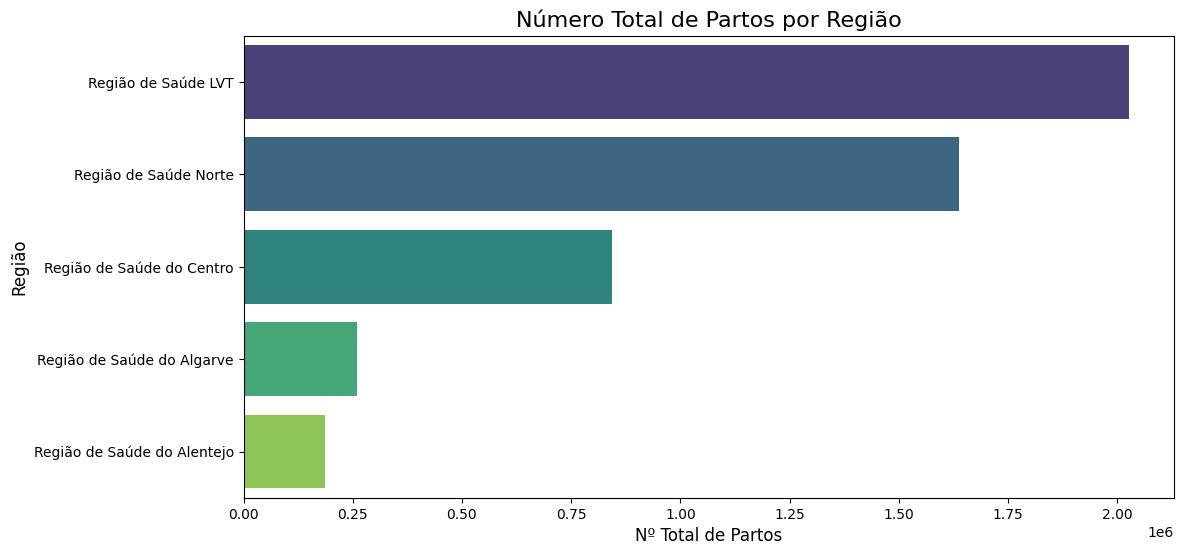

In [11]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Nº Total de Partos', y='Região', data=regioes_partos, palette='viridis')
plt.title('Número Total de Partos por Região', fontsize=16)
plt.xlabel('Nº Total de Partos', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.show()

In [12]:
# Agrupar por região e somar o número total de partos
regioes_cesarianas = file.groupby('Região')['Nº Cesarianas'].sum().reset_index()

# Ordenar os resultados em ordem decrescente
regioes_cesarianas = regioes_cesarianas.sort_values(by='Nº Cesarianas', ascending=False)

# Exibir os dados
print(regioes_cesarianas)

                        Região  Nº Cesarianas
0          Região de Saúde LVT       575864.0
1        Região de Saúde Norte       498570.0
4    Região de Saúde do Centro       239869.0
3   Região de Saúde do Algarve        74351.0
2  Região de Saúde do Alentejo        59506.0


/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/556506920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nº Cesarianas', y='Região', data=regioes_cesarianas, palette='viridis')


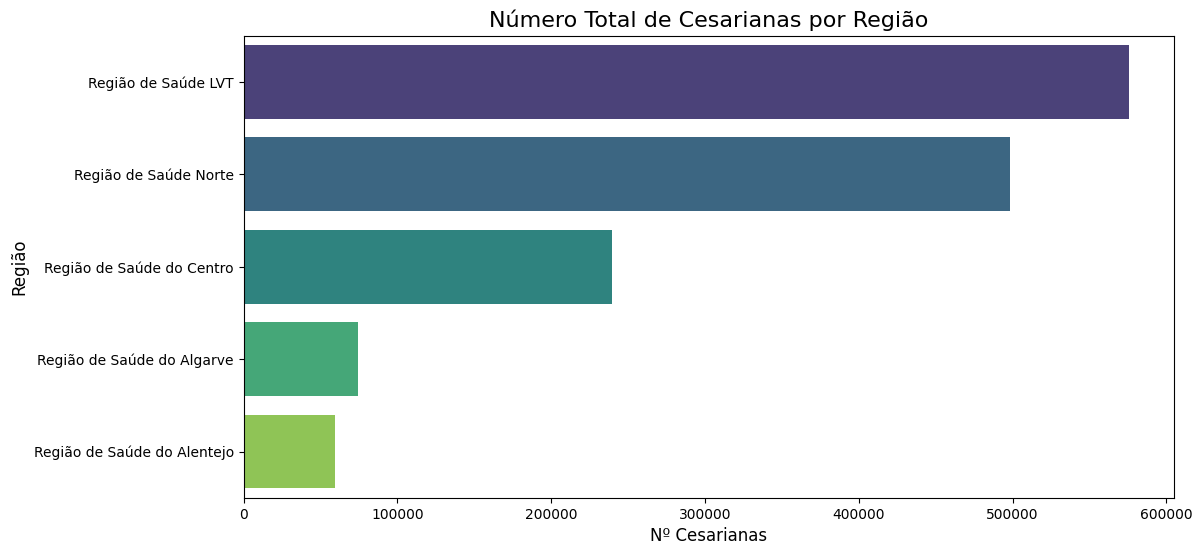

In [13]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Nº Cesarianas', y='Região', data=regioes_cesarianas, palette='viridis')
plt.title('Número Total de Cesarianas por Região', fontsize=16)
plt.xlabel('Nº Cesarianas', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.show()

In [14]:
# Agrupar por instituição e somar os partos
instituicoes_partos = file.groupby('Instituição')['Nº Total de Partos'].sum().reset_index()

# Ordenar por número total de partos em ordem decrescente
instituicoes_partos = instituicoes_partos.sort_values(by='Nº Total de Partos', ascending=False)

# Exibir as 10 instituições com mais partos
print(instituicoes_partos)


                                          Instituição  Nº Total de Partos
22  Centro Hospitalar e Universitário de Coimbra, EPE            330405.0
12     Centro Hospitalar Universitário do Algarve,EPE            252162.0
8   Centro Hospitalar Universitário Lisboa Central...            239790.0
13      Centro Hospitalar Universitário do Porto, EPE            202454.0
25                       Hospital Garcia de Orta, EPE            185809.0
..                                                ...                 ...
55         Unidade Local de Saúde de Santa Maria, EPE                49.0
68       Unidade Local de Saúde do Baixo Mondego, EPE                 0.0
70  Unidade Local de Saúde do Litoral Alentejano, EPE                 0.0
46  Unidade Local de Saúde de Barcelos/Esposende, EPE                 0.0
27                    Hospital Santa Maria Maior, EPE                 0.0

[77 rows x 2 columns]


/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/1774362854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nº Total de Partos', y='Instituição', data=top_instituicoes, palette='viridis')


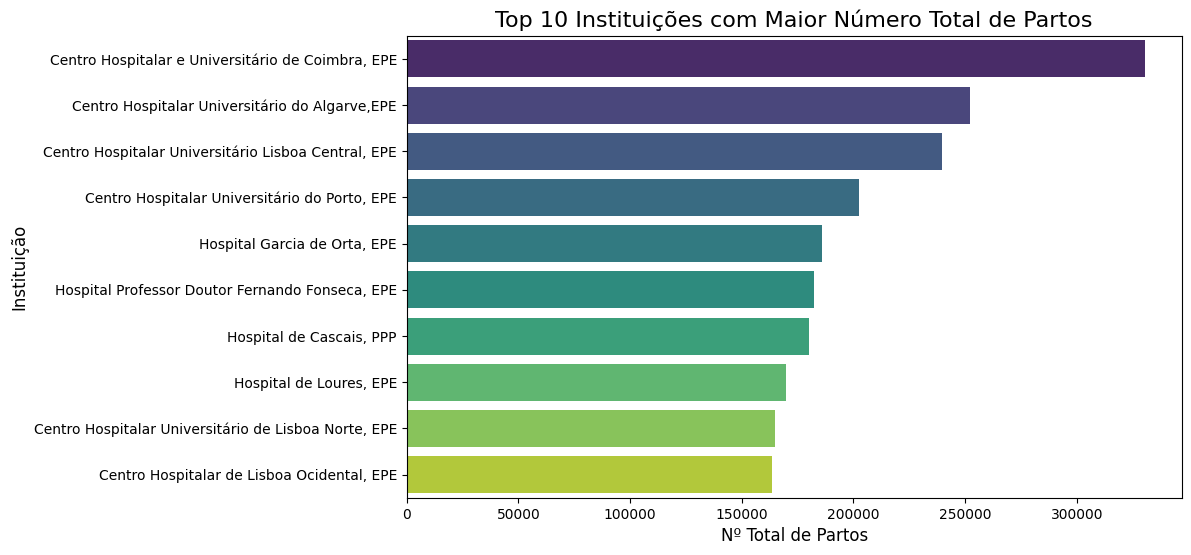

In [15]:

top_instituicoes = instituicoes_partos.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº Total de Partos', y='Instituição', data=top_instituicoes, palette='viridis')
plt.title('Top 10 Instituições com Maior Número Total de Partos', fontsize=16)
plt.xlabel('Nº Total de Partos', fontsize=12)
plt.ylabel('Instituição', fontsize=12)
plt.show()

In [16]:
# Agrupar por instituição e somar as cesarianas
instituicoes_cesarianas = file.groupby('Instituição')['Nº Cesarianas'].sum().reset_index()

# Ordenar por número total de cesarianas em ordem decrescente
instituicoes_cesarianas = instituicoes_cesarianas.sort_values(by='Nº Cesarianas', ascending=False)

# Exibir as 10 instituições com mais cesarianas
print(instituicoes_cesarianas)

                                          Instituição  Nº Cesarianas
22  Centro Hospitalar e Universitário de Coimbra, EPE        93607.0
8   Centro Hospitalar Universitário Lisboa Central...        73621.0
12     Centro Hospitalar Universitário do Algarve,EPE        71448.0
26    Hospital Professor Doutor Fernando Fonseca, EPE        60287.0
13      Centro Hospitalar Universitário do Porto, EPE        58613.0
..                                                ...            ...
55         Unidade Local de Saúde de Santa Maria, EPE           42.0
70  Unidade Local de Saúde do Litoral Alentejano, EPE            0.0
68       Unidade Local de Saúde do Baixo Mondego, EPE            0.0
27                    Hospital Santa Maria Maior, EPE            0.0
46  Unidade Local de Saúde de Barcelos/Esposende, EPE            0.0

[77 rows x 2 columns]


/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/2881976271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nº Cesarianas', y='Instituição', data=top_instituicoes, palette='viridis')


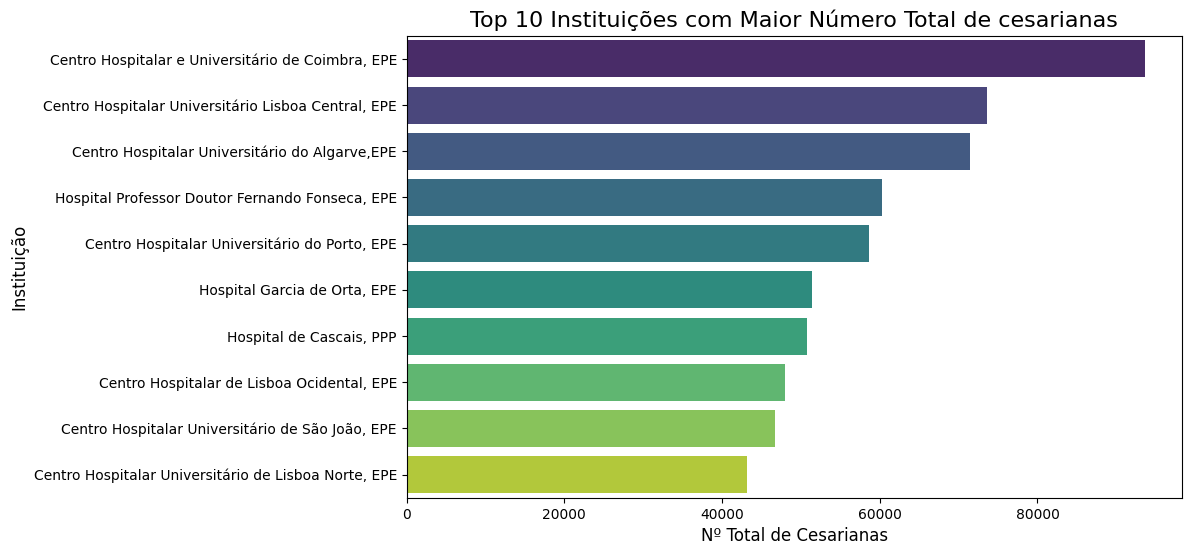

In [17]:

top_instituicoes = instituicoes_cesarianas.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Nº Cesarianas', y='Instituição', data=top_instituicoes, palette='viridis')
plt.title('Top 10 Instituições com Maior Número Total de cesarianas', fontsize=16)
plt.xlabel('Nº Total de Cesarianas', fontsize=12)
plt.ylabel('Instituição', fontsize=12)
plt.show()

In [18]:
# Agrupar por período e somar o número total de partos
periodos_partos = file.groupby('Período')['Nº Total de Partos'].sum().reset_index()

# Ordenar os resultados em ordem decrescente
periodos_partos = periodos_partos.sort_values(by='Nº Total de Partos', ascending=False)

# Exibir os dados
print(periodos_partos)  # Para ver os 10 períodos com mais partos


       Período  Nº Total de Partos
71  2018-12-01             72034.0
83  2019-12-01             72001.0
47  2016-12-01             71752.0
59  2017-12-01             71415.0
35  2015-12-01             70202.0
..         ...                 ...
12  2014-01-01              5527.0
120 2023-01-01              5525.0
132 2024-01-01              5395.0
108 2022-01-01              4915.0
96  2021-01-01              4811.0

[139 rows x 2 columns]


/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/3090405562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nº Total de Partos', y='Período', data=periodos_partos.head(10), palette='viridis')


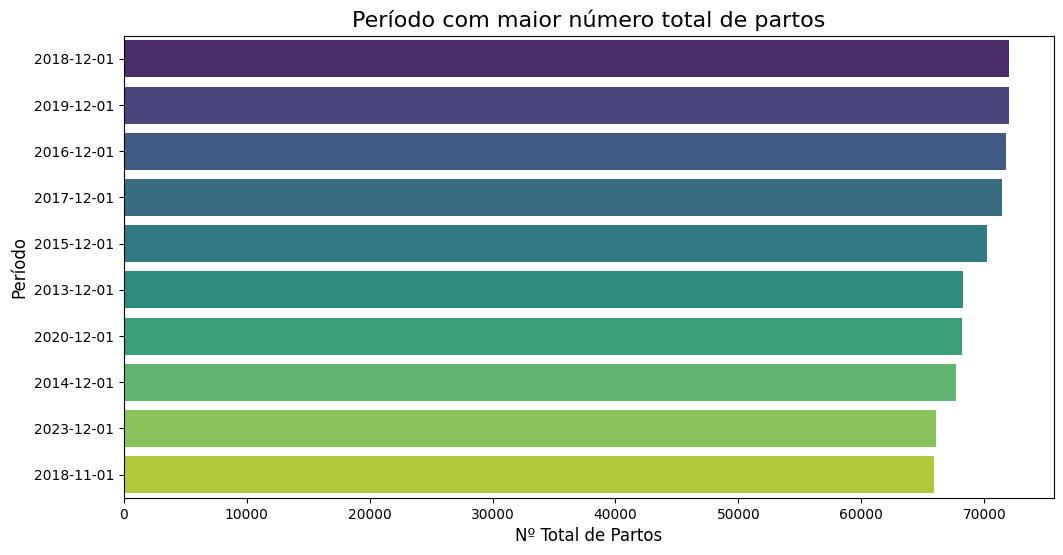

In [19]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Nº Total de Partos', y='Período', data=periodos_partos.head(10), palette='viridis')
plt.title('Período com maior número total de partos', fontsize=16)
plt.xlabel('Nº Total de Partos', fontsize=12)
plt.ylabel('Período', fontsize=12)
plt.show()

In [20]:
# Agrupar por período e somar o número total de partos
periodos_partos = file.groupby('Período')['Nº Total de Partos'].sum().reset_index()

# Ordenar os resultados em ordem crescente
periodos_partos = periodos_partos.sort_values(by='Nº Total de Partos', ascending=True)

# Exibir os dados
print(periodos_partos)  # Para ver os 10 períodos com menos partos

       Período  Nº Total de Partos
96  2021-01-01              4811.0
108 2022-01-01              4915.0
132 2024-01-01              5395.0
120 2023-01-01              5525.0
12  2014-01-01              5527.0
..         ...                 ...
35  2015-12-01             70202.0
59  2017-12-01             71415.0
47  2016-12-01             71752.0
83  2019-12-01             72001.0
71  2018-12-01             72034.0

[139 rows x 2 columns]


/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/3819095895.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nº Total de Partos', y='Período', data=periodos_partos.head(10), palette='viridis')


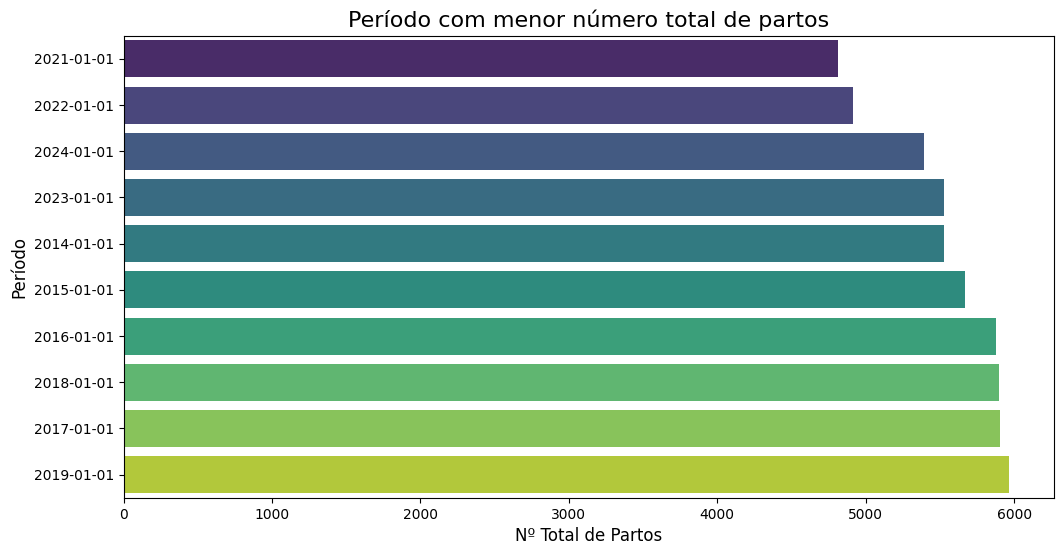

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Nº Total de Partos', y='Período', data=periodos_partos.head(10), palette='viridis')
plt.title('Período com menor número total de partos', fontsize=16)
plt.xlabel('Nº Total de Partos', fontsize=12)
plt.ylabel('Período', fontsize=12)
plt.show()

In [22]:
# Agrupar por instituição e somar as cesarianas
instituicoes_cesarianas = file.groupby('Instituição')['Nº Cesarianas'].sum().reset_index()

# Ordenar por número total de cesarianas em ordem cescentes
instituicoes_cesarianas = instituicoes_cesarianas.sort_values(by='Nº Cesarianas', ascending=True)

# Exibir as 10 instituições com mais cesarianas
print(instituicoes_cesarianas)

                                          Instituição  Nº Cesarianas
27                    Hospital Santa Maria Maior, EPE            0.0
46  Unidade Local de Saúde de Barcelos/Esposende, EPE            0.0
70  Unidade Local de Saúde do Litoral Alentejano, EPE            0.0
68       Unidade Local de Saúde do Baixo Mondego, EPE            0.0
55         Unidade Local de Saúde de Santa Maria, EPE           42.0
..                                                ...            ...
13      Centro Hospitalar Universitário do Porto, EPE        58613.0
26    Hospital Professor Doutor Fernando Fonseca, EPE        60287.0
12     Centro Hospitalar Universitário do Algarve,EPE        71448.0
8   Centro Hospitalar Universitário Lisboa Central...        73621.0
22  Centro Hospitalar e Universitário de Coimbra, EPE        93607.0

[77 rows x 2 columns]


/var/folders/d2/q8bmm2pd0bg3xjbjj3599j2w0000gn/T/ipykernel_73530/3284300480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nº Cesarianas', y='Instituição', data=instituicoes_cesarianas.head(10), palette='viridis')


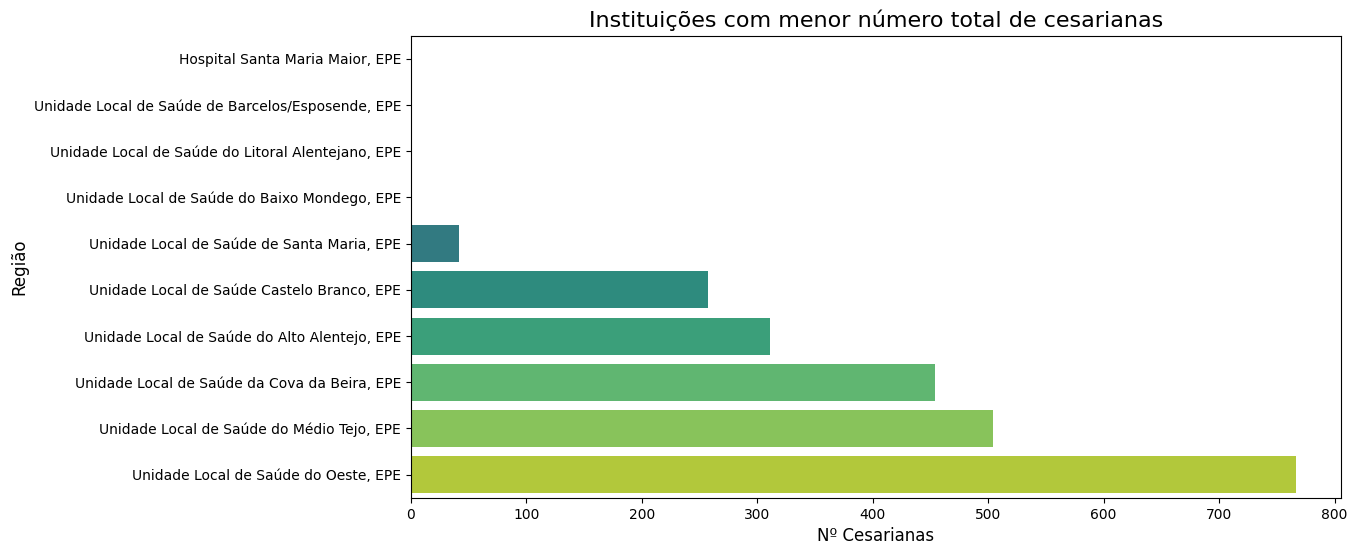

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Nº Cesarianas', y='Instituição', data=instituicoes_cesarianas.head(10), palette='viridis')
plt.title('Instituições com menor número total de cesarianas', fontsize=16)
plt.xlabel('Nº Cesarianas', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.show()